# ライブラリをインポート

In [1]:
import pandas as pd

# 各CSVのデータを取得する

In [2]:
# 顧客マスタの取得
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [3]:
# 商品マスタの取得
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


# 取引履歴は同じデータにまとめる

In [4]:
# transactionをUNIONする
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


# 取引履歴の詳細も同じデータに

In [5]:
# transaction_detailをUNIONする
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


# マスタデータを結合する

In [6]:
# 取引履歴と取引履歴の詳細をJOINする
join_transaction_detail = pd.merge(transaction, transaction_detail, on="transaction_id", how="left")
join_transaction_detail.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [7]:
# できたモノを更に商品マスタとJOINする
join_transaction_detail_item = pd.merge(join_transaction_detail, item_master, on="item_id", how="inner")
join_transaction_detail_item.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000


In [8]:
# 最後に顧客マスタとJOINする
join_transaction_detail_item_customer = pd.merge(join_transaction_detail_item, customer_master, on="customer_id", how="left")
join_transaction_detail_item_customer.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,PC-E,210000,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,PC-C,120000,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,PC-E,210000,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,PC-B,85000,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県


In [9]:
# データの検算をしておく

In [10]:
join_transaction_detail["price"].sum()

np.int64(1074750000)

In [11]:
join_transaction_detail_item["price"].sum()

np.int64(1074750000)

In [12]:
join_transaction_detail_item_customer["price"].sum()

np.int64(1074750000)

# 各種統計量を把握する

In [13]:
# nullの数を把握する
join_transaction_detail_item_customer.isnull().sum()

,0
transaction_id,0
price,0
payment_date,0
customer_id,0
detail_id,0
item_id,0
quantity,0
item_name,0
item_price,0
customer_name,0


In [14]:
# 基本の統計量を出力する
join_transaction_detail_item_customer.describe()

,price,detail_id,quantity,item_price,age
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,150440.929451,3571.500000,1.199888,121698.628219,50.265677
std,85991.561558,2062.439494,0.513647,64571.311830,17.190314
min,50000.000000,0.000000,1.000000,50000.000000,20.000000
25%,85000.000000,1785.750000,1.000000,50000.000000,36.000000
50%,135000.000000,3571.500000,1.000000,102500.000000,50.000000
75%,210000.000000,5357.250000,1.000000,187500.000000,65.000000
max,750000.000000,7143.000000,4.000000,210000.000000,80.000000


In [15]:
# 日付の範囲を確認する
# print()で明示的に出力するようにした

# 最小の日付
print(join_transaction_detail_item_customer["payment_date"].min())

# 最大の日付
print(join_transaction_detail_item_customer["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


# 月別で値を集計する

In [16]:
join_transaction_detail_item_customer.dtypes

,0
transaction_id,object
price,int64
payment_date,object
customer_id,object
detail_id,int64
item_id,object
quantity,int64
item_name,object
item_price,int64
customer_name,object


In [17]:
# object型をdatetime型に変換する
join_transaction_detail_item_customer["payment_date"] = pd.to_datetime(join_transaction_detail_item_customer["payment_date"])
join_transaction_detail_item_customer["payment_month"] = join_transaction_detail_item_customer["payment_date"].dt.strftime("%Y%m")
join_transaction_detail_item_customer[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [18]:
# payment_month列のデータ型を確認
join_transaction_detail_item_customer["payment_month"].dtype

dtype('O')

In [19]:
# payment_date列のデータ型を確認
join_transaction_detail_item_customer["payment_date"].dtype

dtype('<M8[ns]')

In [20]:
# price列のデータ型も確認
print(join_transaction_detail_item_customer["price"].dtype)

int64


In [21]:
# この書き方だとダメ
# join_transaction_detail_item_customer.groupby("payment_month").sum()["price"]

# こう書く
join_transaction_detail_item_customer.groupby("payment_month")["price"].sum()

,price
payment_month,
201902,179190000
201903,175375000
201904,176720000
201905,171385000
201906,183395000
201907,188685000


# 月別で商品を集計する

In [22]:
join_transaction_detail_item_customer.groupby("payment_month")["price"].sum()

,price
payment_month,
201902,179190000
201903,175375000
201904,176720000
201905,171385000
201906,183395000
201907,188685000


In [23]:
# 月別、商品別で集計
join_transaction_detail_item_customer.groupby(["payment_month", "item_name"])[["price", "quantity"]].sum()

price  quantity
payment_month item_name                    
201902        PC-A       29270000       483
              PC-B       27785000       297
              PC-C       22905000       165
              PC-D       35010000       173
              PC-E       64220000       285
201903        PC-A       30440000       520
              PC-B       28540000       300
              PC-C       20275000       159
              PC-D       27205000       143
              PC-E       68915000       305
201904        PC-A       31600000       518
              PC-B       26850000       276
              PC-C       23665000       183
              PC-D       26045000       135
              PC-E       68560000       309
201905        PC-A       29575000       497
              PC-B       28660000       298
              PC-C       21885000       171
              PC-D       27485000       144
              PC-E       63780000       280
201906        PC-A       30650000       520
              PC-B       28020000       282
              PC-C       24865000       182
              PC-D       32550000       160
              PC-E       67310000       302
201907        PC-A       30225000       505
              PC-B       31350000       332
              PC-C       21715000       162
              PC-D       28170000       145
              PC-E       77225000       341

# pivot_tableで可視化をする

In [24]:
pd.pivot_table(join_transaction_detail_item_customer, index='item_name', columns = 'payment_month', values = 'price', aggfunc='sum')

payment_month,201902,201903,201904,201905,201906,201907
item_name,,,,,,
PC-A,29270000,30440000,31600000,29575000,30650000,30225000
PC-B,27785000,28540000,26850000,28660000,28020000,31350000
PC-C,22905000,20275000,23665000,21885000,24865000,21715000
PC-D,35010000,27205000,26045000,27485000,32550000,28170000
PC-E,64220000,68915000,68560000,63780000,67310000,77225000


In [26]:
graph_data = pd.pivot_table(join_transaction_detail_item_customer, index='payment_month', columns = 'item_name', values = 'price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,29270000,27785000,22905000,35010000,64220000
201903,30440000,28540000,20275000,27205000,68915000
201904,31600000,26850000,23665000,26045000,68560000
201905,29575000,28660000,21885000,27485000,63780000
201906,30650000,28020000,24865000,32550000,67310000


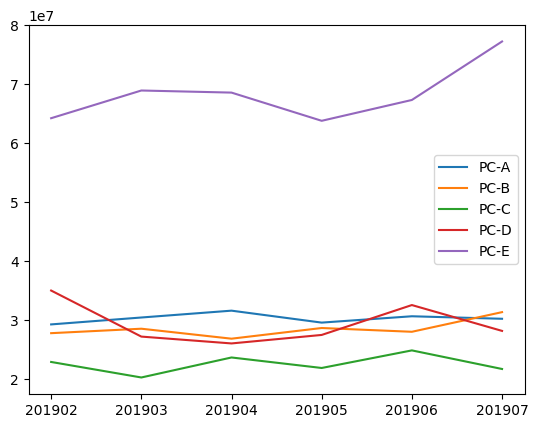

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()